<a href="https://colab.research.google.com/github/pratikabhang/AI-DRIVEN-CYBERSECURITY-THREAT-PREDICTION-PLATFORM/blob/main/python_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# =========================================================
# TASK 1: Interactive Calculator Using Python
# =========================================================

def calculator():
    """A simple calculator that performs basic arithmetic operations."""
    print("Simple Calculator")
    print("Operations: +, -, *, /\n")

    while True:
        try:
            num1 = float(input("Enter first number: "))
            operator = input("Enter operator (+, -, *, /): ")
            num2 = float(input("Enter second number: "))
        except ValueError:
            print("Invalid input. Please enter numbers.")
            continue

        if operator == '+':
            result = num1 + num2
        elif operator == '-':
            result = num1 - num2
        elif operator == '*':
            result = num1 * num2
        elif operator == '/':
            if num2 == 0:
                print("Error: Division by zero is not allowed.")
                continue
            result = num1 / num2
        else:
            print("Invalid operator.")
            continue

        print(f"Result: {num1} {operator} {num2} = {result}")

        if input("Do you want to perform another calculation? (yes/no): ").lower() != 'yes':
            break

calculator()


Simple Calculator
Operations: +, -, *, /

Enter first number: 2
Enter operator (+, -, *, /): *
Enter second number: 2
Result: 2.0 * 2.0 = 4.0
Do you want to perform another calculation? (yes/no): n


In [2]:
# =========================================================
# TASK 2: Import Required Libraries
# =========================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully.")


Libraries imported successfully.


In [3]:
# =========================================================
# TASK 3: Generate Synthetic Cybersecurity Data
# =========================================================

num_records = 1000

timestamps = pd.date_range(start="2023-01-01", periods=num_records, freq="s")

source_ips = ['192.168.1.' + str(i) for i in np.random.randint(1, 255, num_records)]
destination_ips = ['10.0.0.' + str(i) for i in np.random.randint(1, 255, num_records)]

common_ports = [80, 443, 22, 21, 23, 53, 3389]
unusual_ports = [np.random.randint(49152, 65535) for _ in range(num_records // 20)]

ports = np.random.choice(common_ports, num_records - len(unusual_ports)).tolist() + unusual_ports
np.random.shuffle(ports)

protocols = np.random.choice(['TCP', 'UDP', 'ICMP'], num_records, p=[0.7, 0.2, 0.1])

bytes_sent = np.random.randint(50, 5000, num_records)
bytes_received = np.random.randint(50, 10000, num_records)
duration_seconds = np.random.uniform(1, 300, num_records)

statuses = np.random.choice(['success', 'failure', 'timeout'], num_records, p=[0.85, 0.1, 0.05])

df_cybersecurity = pd.DataFrame({
    'timestamp': timestamps,
    'source_ip': source_ips,
    'destination_ip': destination_ips,
    'port': ports,
    'protocol': protocols,
    'bytes_sent': bytes_sent,
    'bytes_received': bytes_received,
    'duration_seconds': duration_seconds,
    'status': statuses
})

df_cybersecurity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   timestamp         1000 non-null   datetime64[ns]
 1   source_ip         1000 non-null   object        
 2   destination_ip    1000 non-null   object        
 3   port              1000 non-null   int64         
 4   protocol          1000 non-null   object        
 5   bytes_sent        1000 non-null   int64         
 6   bytes_received    1000 non-null   int64         
 7   duration_seconds  1000 non-null   float64       
 8   status            1000 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 70.4+ KB


In [4]:
# =========================================================
# TASK 4: Inject Cybersecurity Anomalies
# =========================================================

# High traffic anomaly
idx_high = np.random.choice(df_cybersecurity.index, 10, replace=False)
df_cybersecurity.loc[idx_high, 'bytes_sent'] = np.random.randint(100000, 1000000, 10)
df_cybersecurity.loc[idx_high, 'status'] = 'failure'

# Short duration anomaly
idx_short = np.random.choice(
    df_cybersecurity[df_cybersecurity['status'] == 'failure'].index, 10, replace=False
)
df_cybersecurity.loc[idx_short, 'duration_seconds'] = np.random.uniform(0.1, 1.0, 10)

# Unusual port + high traffic
idx_ports = np.random.choice(df_cybersecurity.index, 10, replace=False)
df_cybersecurity.loc[idx_ports, 'port'] = np.random.randint(1024, 49151, 10)
df_cybersecurity.loc[idx_ports, 'bytes_sent'] = np.random.randint(50000, 500000, 10)
df_cybersecurity.loc[idx_ports, 'bytes_received'] = np.random.randint(50000, 500000, 10)
df_cybersecurity.loc[idx_ports, 'status'] = 'failure'


In [5]:
# =========================================================
# TASK 5: Preprocessing & Feature Engineering
# =========================================================

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

numerical_features = ['bytes_sent', 'bytes_received', 'duration_seconds', 'port']
categorical_features = ['protocol', 'status']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

processed_array = preprocessor.fit_transform(df_cybersecurity)

encoded_cols = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
final_columns = numerical_features + list(encoded_cols)

df_processed = pd.DataFrame(processed_array, columns=final_columns)


In [6]:
# =========================================================
# TASK 6: Isolation Forest Anomaly Detection
# =========================================================

from sklearn.ensemble import IsolationForest

df_results = df_cybersecurity.copy()

iso_forest = IsolationForest(contamination=0.05, random_state=42)
iso_forest.fit(df_processed)

df_results['anomaly_score'] = iso_forest.decision_function(df_processed)
df_results['anomaly_prediction'] = iso_forest.predict(df_processed)

df_results['anomaly_prediction'].value_counts()


,count
anomaly_prediction,
1,950
-1,50


In [7]:
# =========================================================
# TASK 7: Extract Threats
# =========================================================

df_threats = df_results[df_results['anomaly_prediction'] == -1].copy()
df_threats.head()


,timestamp,source_ip,destination_ip,port,protocol,bytes_sent,bytes_received,duration_seconds,status,anomaly_score,anomaly_prediction
2,2023-01-01 00:00:02,192.168.1.197,10.0.0.157,3389,ICMP,2725,7233,28.849070,timeout,-0.054494,-1
15,2023-01-01 00:00:15,192.168.1.155,10.0.0.58,58739,TCP,950,9752,254.488088,timeout,-0.068928,-1
19,2023-01-01 00:00:19,192.168.1.180,10.0.0.247,22,UDP,513,3344,16.668160,timeout,-0.008082,-1
24,2023-01-01 00:00:24,192.168.1.34,10.0.0.51,3389,ICMP,1637,2907,53.606714,timeout,-0.057037,-1
46,2023-01-01 00:00:46,192.168.1.102,10.0.0.11,51700,UDP,738,8581,112.961893,failure,-0.061756,-1


In [8]:
# =========================================================
# TASK 8: Threat Level Classification
# =========================================================

threshold_high = df_threats['anomaly_score'].quantile(0.25)
threshold_medium = df_threats['anomaly_score'].quantile(0.50)

def assign_threat_level(score):
    if score <= threshold_high:
        return 'High'
    elif score <= threshold_medium:
        return 'Medium'
    else:
        return 'Low'

df_threats['threat_level'] = df_threats['anomaly_score'].apply(assign_threat_level)


In [9]:
# =========================================================
# TASK 9: Threat Alerts
# =========================================================

print("--- Threat Alerts ---")
for _, row in df_threats.iterrows():
    print(f"Alert: Detected {row['threat_level']} threat!")
    print(f"Timestamp: {row['timestamp']}")
    print(f"Source IP: {row['source_ip']}")
    print(f"Destination IP: {row['destination_ip']}")
    print(f"Port: {row['port']} | Protocol: {row['protocol']}")
    print(f"Anomaly Score: {row['anomaly_score']:.4f}")
    print("-" * 40)


--- Threat Alerts ---
Alert: Detected Medium threat!
Timestamp: 2023-01-01 00:00:02
Source IP: 192.168.1.197
Destination IP: 10.0.0.157
Port: 3389 | Protocol: ICMP
Anomaly Score: -0.0545
----------------------------------------
Alert: Detected High threat!
Timestamp: 2023-01-01 00:00:15
Source IP: 192.168.1.155
Destination IP: 10.0.0.58
Port: 58739 | Protocol: TCP
Anomaly Score: -0.0689
----------------------------------------
Alert: Detected Low threat!
Timestamp: 2023-01-01 00:00:19
Source IP: 192.168.1.180
Destination IP: 10.0.0.247
Port: 22 | Protocol: UDP
Anomaly Score: -0.0081
----------------------------------------
Alert: Detected Medium threat!
Timestamp: 2023-01-01 00:00:24
Source IP: 192.168.1.34
Destination IP: 10.0.0.51
Port: 3389 | Protocol: ICMP
Anomaly Score: -0.0570
----------------------------------------
Alert: Detected Medium threat!
Timestamp: 2023-01-01 00:00:46
Source IP: 192.168.1.102
Destination IP: 10.0.0.11
Port: 51700 | Protocol: UDP
Anomaly Score: -0.0618
-

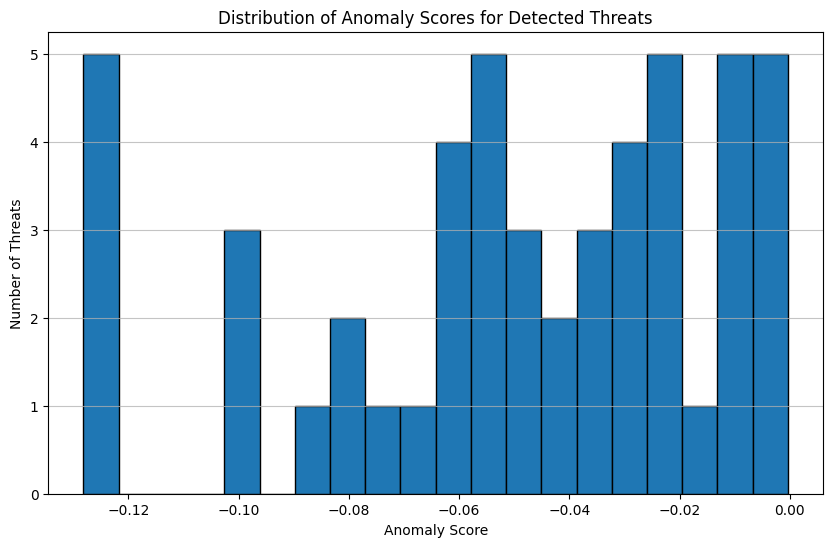

In [10]:
# =========================================================
# TASK 10: Visualization – Anomaly Distribution
# =========================================================

plt.figure(figsize=(10, 6))
plt.hist(df_threats['anomaly_score'], bins=20, edgecolor='black')
plt.title('Distribution of Anomaly Scores for Detected Threats')
plt.xlabel('Anomaly Score')
plt.ylabel('Number of Threats')
plt.grid(axis='y', alpha=0.75)
plt.show()


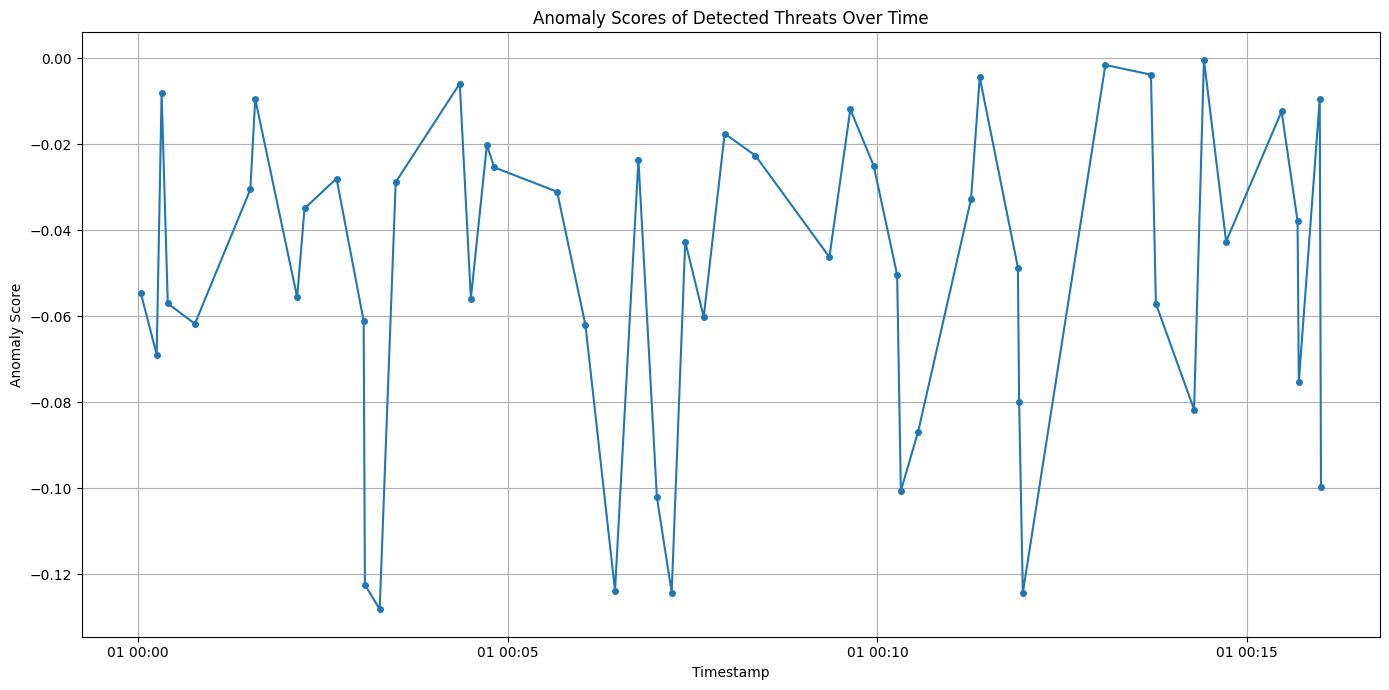

In [11]:
# =========================================================
# TASK 11: Visualization – Threat Scores Over Time
# =========================================================

plt.figure(figsize=(14, 7))
plt.plot(df_threats['timestamp'], df_threats['anomaly_score'], marker='o', linestyle='-', markersize=4)
plt.title('Anomaly Scores of Detected Threats Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Anomaly Score')
plt.grid(True)
plt.tight_layout()
plt.show()


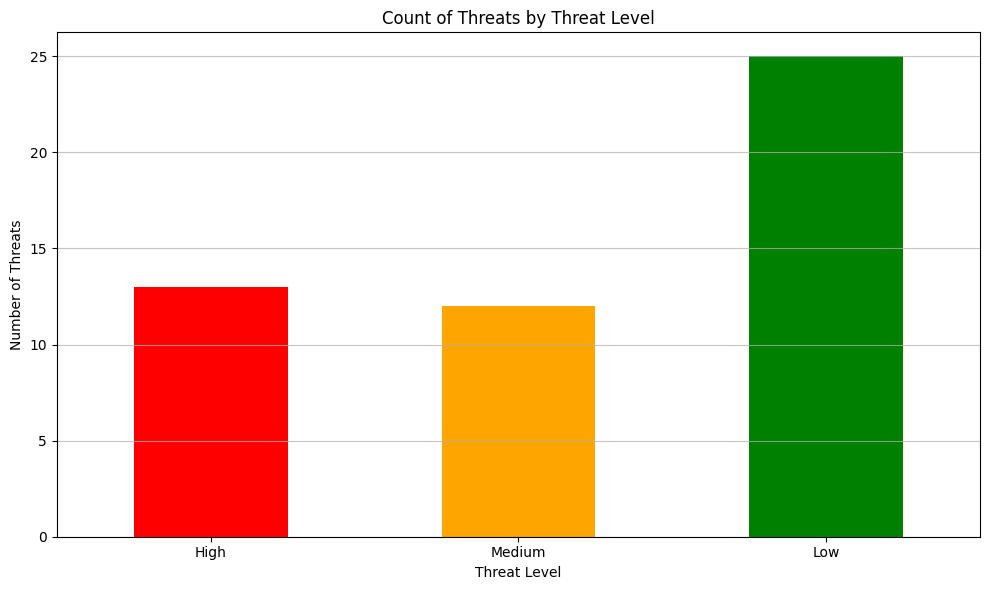

In [12]:
# =========================================================
# TASK 12: Visualization – Count of Threats by Threat Level
# =========================================================

threat_level_counts = df_threats['threat_level'].value_counts().reindex(['High', 'Medium', 'Low'])

plt.figure(figsize=(10, 6))
threat_level_counts.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Count of Threats by Threat Level')
plt.xlabel('Threat Level')
plt.ylabel('Number of Threats')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()
